NameError: name 'Introduction' is not defined

Introduction

Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
yf.pdr_override()

#time stamps
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
    
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-28,147.050003,149.080002,146.830002,147.410004,146.627350,50547000,APPLE
2023-03-01,146.830002,147.229996,145.009995,145.309998,144.538483,55479000,APPLE
2023-03-02,144.380005,146.710007,143.899994,145.910004,145.135330,52238100,APPLE
2023-03-03,148.039993,151.110001,147.330002,151.029999,150.228119,70732300,APPLE
2023-03-06,153.789993,156.300003,153.460007,153.830002,153.013275,87558000,APPLE
...,...,...,...,...,...,...,...
2024-02-21,193.360001,199.440002,191.949997,194.770004,194.770004,103844000,TESLA
2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500,TESLA
2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78670300,TESLA


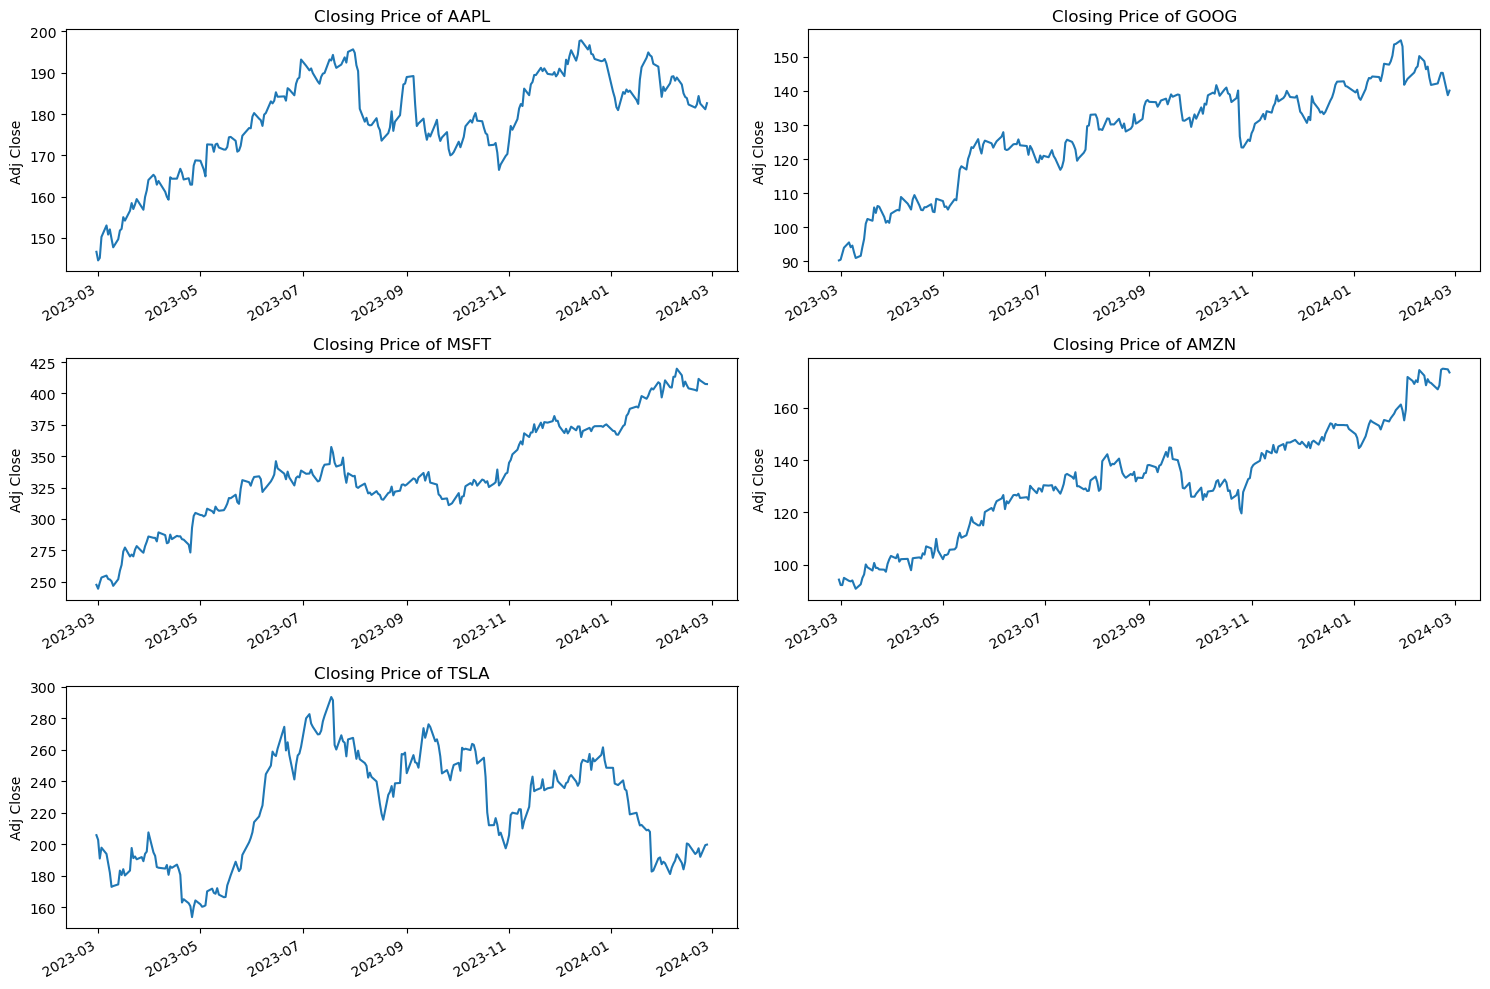

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

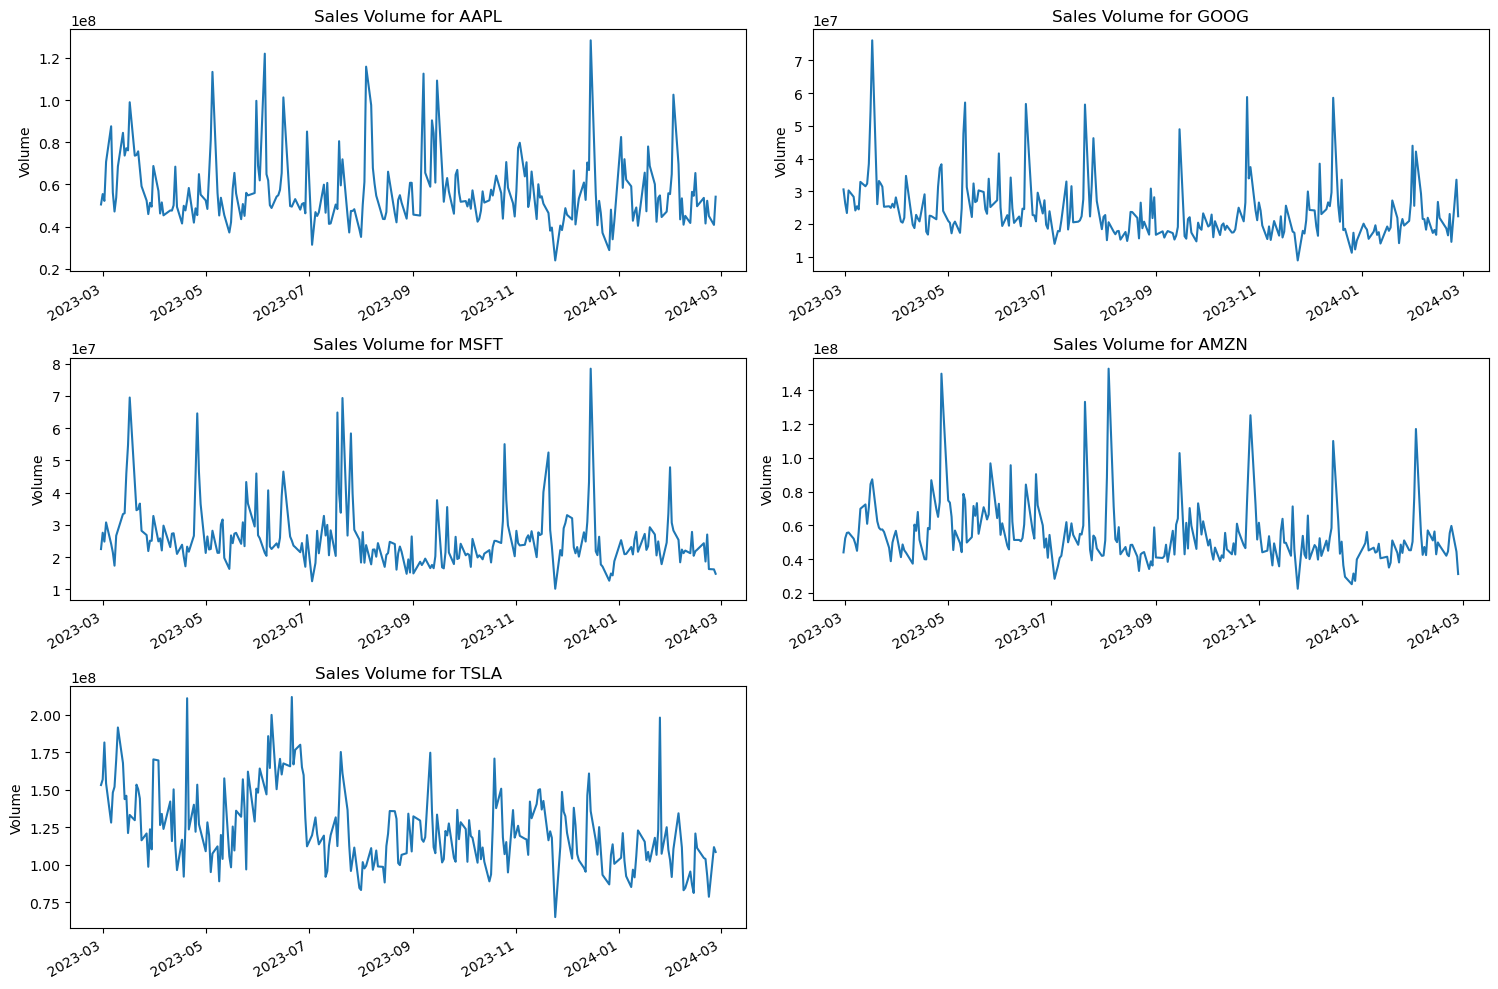

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [10]:
ma_day = [10, 20, 50] 

# Calculate moving averages and RSI for each company
for ma in ma_day:
    for company in company_list:
        column_name_ma = f"MA for {ma} days"
        company[column_name_ma] = company['Adj Close'].rolling(ma).mean()
        
# Calculate RSI for each company
rsi_period = 14  # RSI period
for company in company_list:
    delta = company['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=rsi_period, min_periods=1).mean()
    avg_loss = loss.rolling(window=rsi_period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    company['RSI'] = rsi

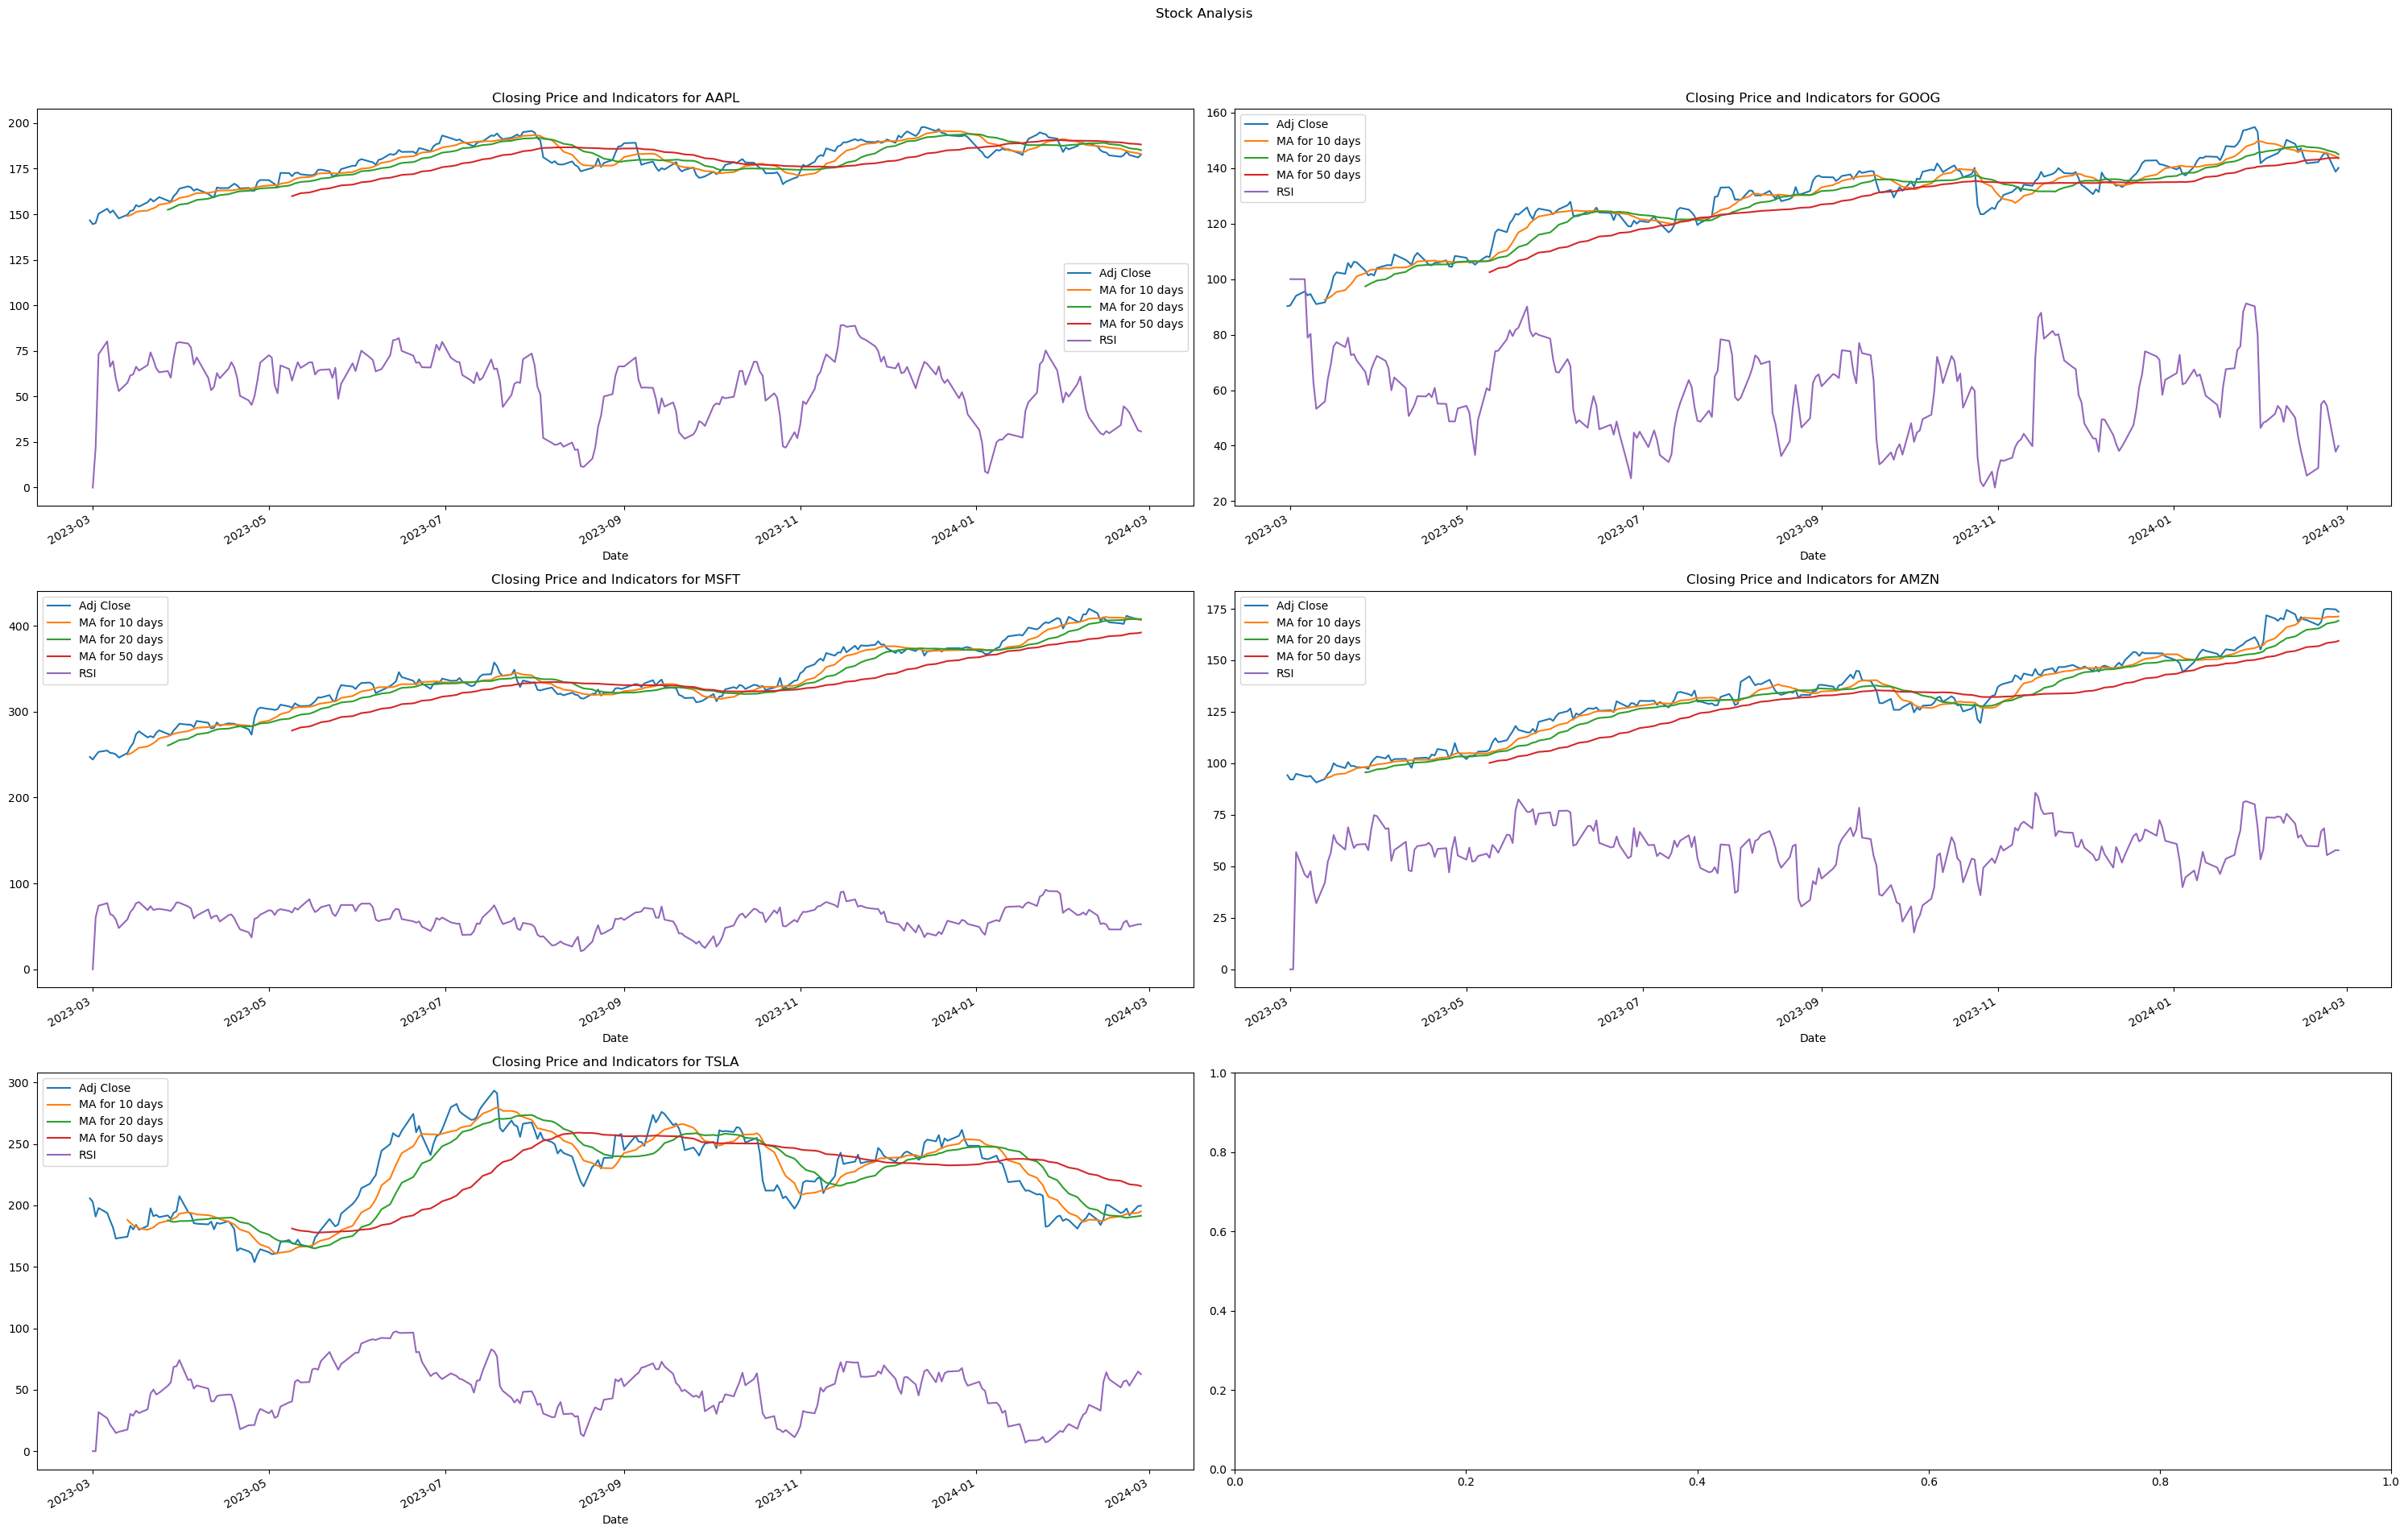

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
fig.suptitle('Stock Analysis')

# List of stock symbols
stock_symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# Function to plot the data for a given company
def plot_company_data(ax, company_df, stock_symbol):
    company_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'RSI']].plot(ax=ax)
    ax.set_title(f"Closing Price and Indicators for {stock_symbol}")
    ax.legend()

# Plot data for each company on separate graphs
for ax, company_df, stock_symbol in zip(axes.flatten(), [AAPL, GOOG, MSFT, AMZN, TSLA], stock_symbols):
    plot_company_data(ax, company_df, stock_symbol)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

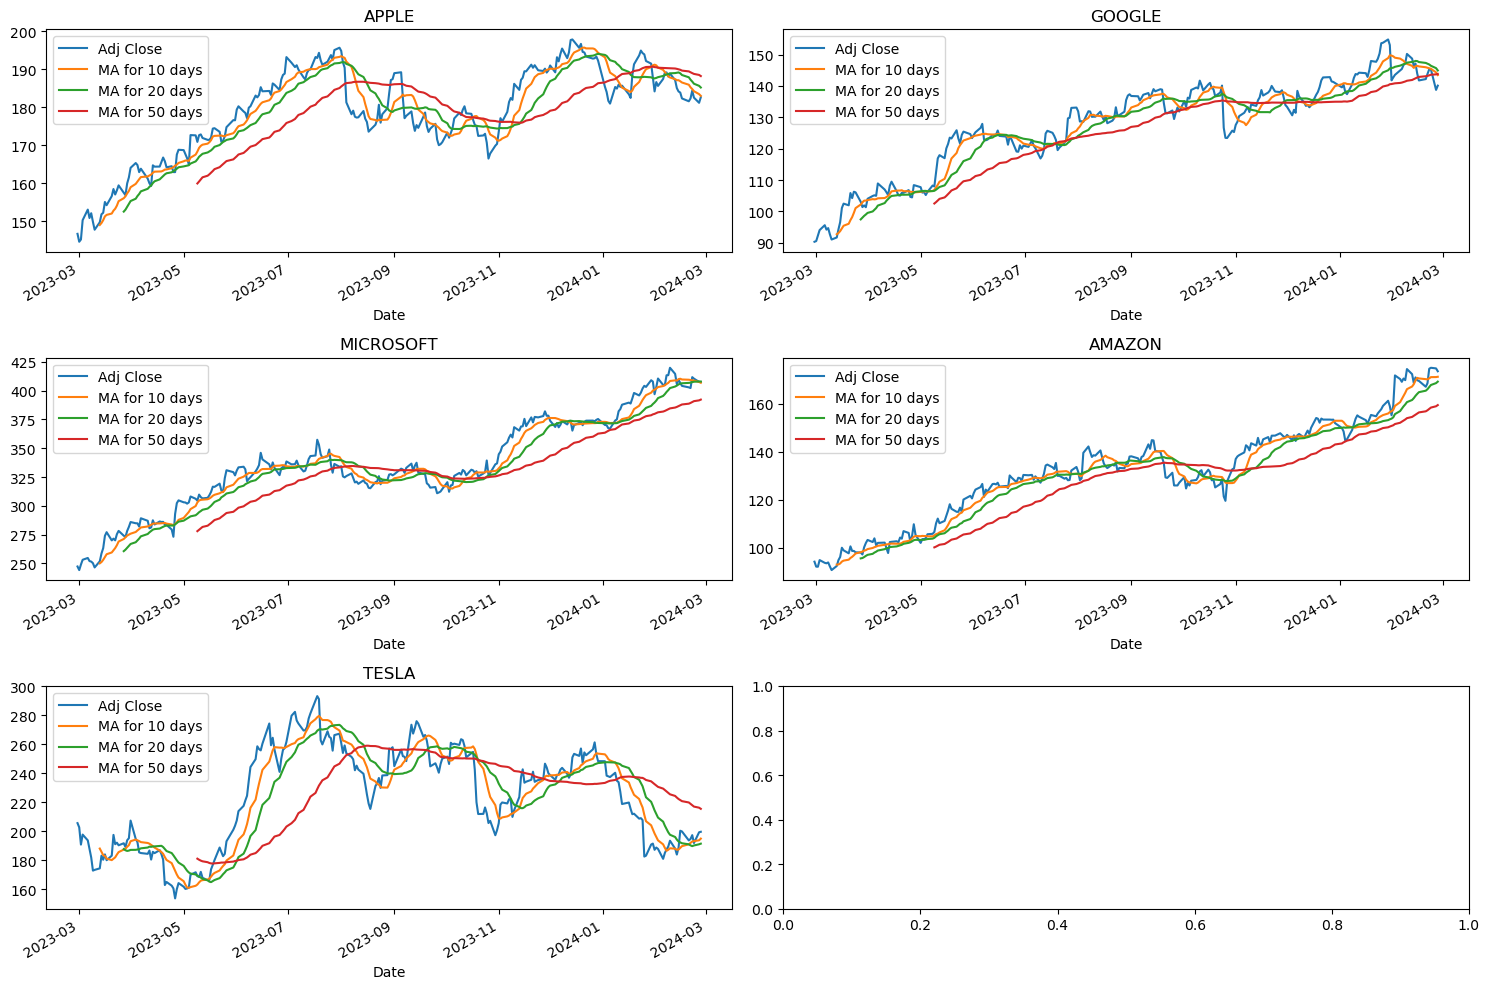

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2, 0])  # Use a different subplot for TSLA
axes[2, 0].set_title('TESLA')

fig.tight_layout()

plt.show()


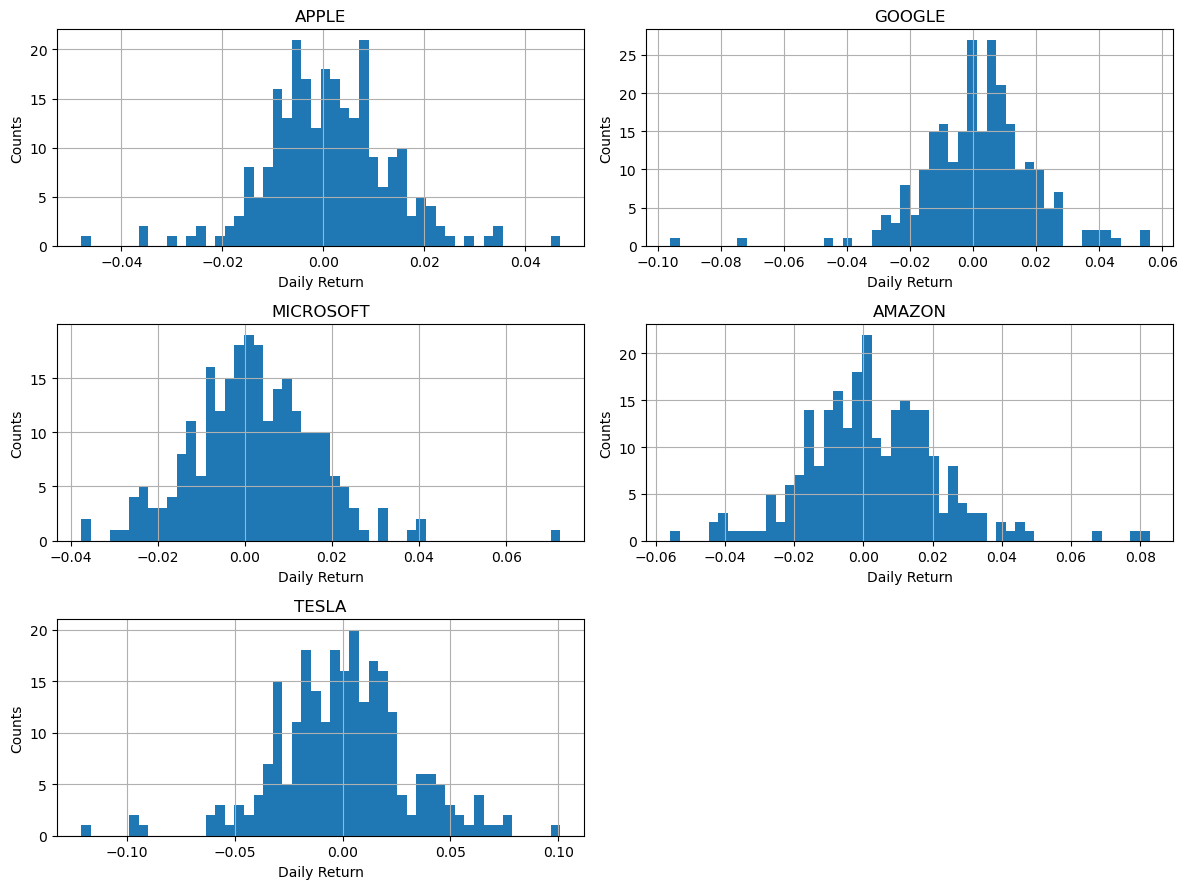

In [13]:
#Plot return rates

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

[*********************100%%**********************]  5 of 5 completed


Text(0.5, 1.0, 'Correlation of stock closing price')

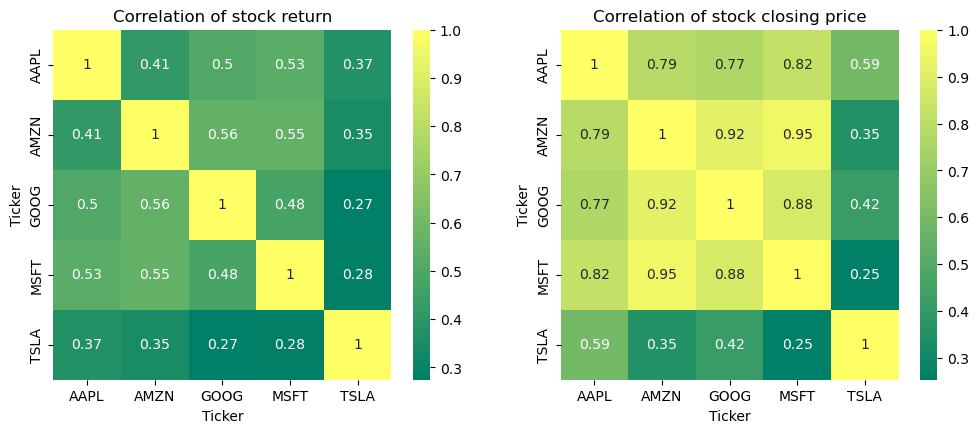

In [19]:
# Fetch historical data for tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price' )

In [89]:
#Model Development

# Get the stock quote
df = yf.download('TSLA', start='2012-01-01', end=datetime.now())

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



[*********************100%%**********************]  1 of 1 completed

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [90]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(64, return_sequences=False, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae'])

# Train the model
model.fit(x_train, y_train, validation_split = 0.2, batch_size=120, epochs=5)  # Adjust epochs and batch size as needed
model.history.history.keys()

Epoch 1/5
19/19 [==============================] - 3s 93ms/step - loss: 0.0075 - mae: 0.0513 - val_loss: 0.0357 - val_mae: 0.1346
Epoch 2/5
19/19 [==============================] - 1s 79ms/step - loss: 0.0015 - mae: 0.0237 - val_loss: 0.0149 - val_mae: 0.0960
Epoch 3/5
19/19 [==============================] - 1s 79ms/step - loss: 6.3023e-04 - mae: 0.0148 - val_loss: 0.0051 - val_mae: 0.0562
Epoch 4/5
19/19 [==============================] - 1s 79ms/step - loss: 3.5429e-04 - mae: 0.0120 - val_loss: 0.0035 - val_mae: 0.0442
Epoch 5/5
19/19 [==============================] - 2s 81ms/step - loss: 2.5710e-04 - mae: 0.0088 - val_loss: 0.0029 - val_mae: 0.0398


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

C:\Users\aidan\AppData\Local\Temp\ipykernel_16304\1215310937.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values_to_plot, 'bo', color='blue', label='Training loss')
C:\Users\aidan\AppData\Local\Temp\ipykernel_16304\1215310937.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values_to_plot, 'b', color='red', label='Validation loss')


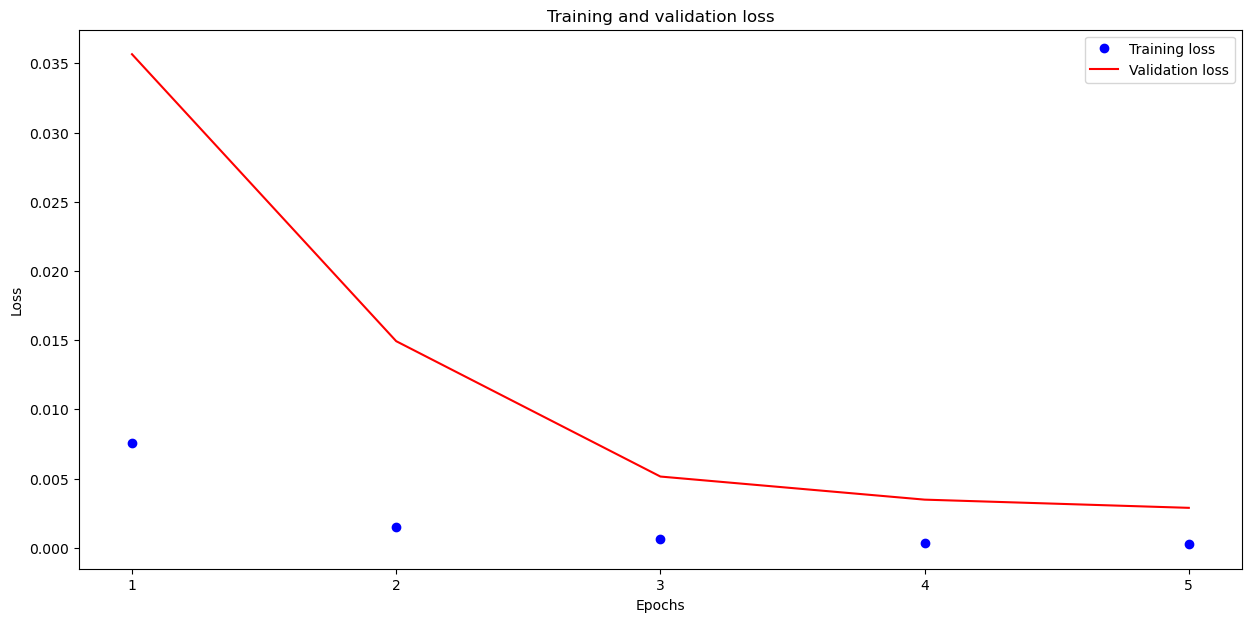

In [91]:
history_dict = model.history.history

# Extract the loss and validation loss values.
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Let's say you want to plot the first 150 epochs. Ensure that you have enough data points.
epochs_to_plot = 50 #150 before
loss_values_to_plot = loss_values[:epochs_to_plot] if len(loss_values) >= epochs_to_plot else loss_values
val_loss_values_to_plot = val_loss_values[:epochs_to_plot] if len(val_loss_values) >= epochs_to_plot else val_loss_values
epochs = range(1, len(loss_values_to_plot) + 1)

# Now plot the training and validation loss.
plt.figure(figsize=(15, 7))
plt.plot(epochs, loss_values_to_plot, 'bo', color='blue', label='Training loss')
plt.plot(epochs, val_loss_values_to_plot, 'b', color='red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.show()

In [92]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

from sklearn.metrics import r2_score
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
r2 = r2_score(y_test,predictions)
r2


5/5 [==============================] - 1s 12ms/step


0.6181541289454933

C:\Users\aidan\AppData\Local\Temp\ipykernel_16304\1706004183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:,'Predictions'] = predictions


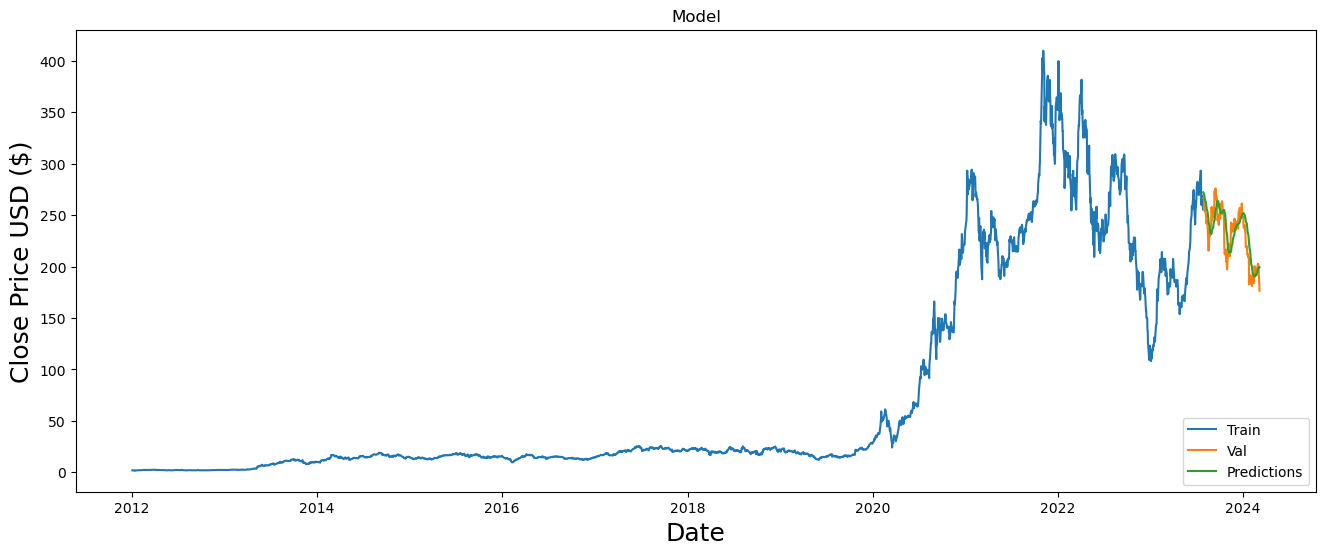

In [93]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid.loc[:,'Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

